# Network Intrusion Detection

### Set Up

In [1]:
# Import required libraries & modules
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score
import seaborn as sns
from scipy import stats
from matplotlib import rcParams
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay,precision_score, recall_score, f1_score, roc_curve, RocCurveDisplay, auc
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import roc_curve, auc
import plotly.graph_objects as go
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from keras.layers import Input, Dense
from keras.models import Model
from keras.models import Sequential
from keras.layers import GRU, Dense
from numpy import array
from keras.layers import Input, Dense, LSTM
from keras.models import Model, Sequential
from numpy import array
from keras.callbacks import EarlyStopping

### Loading Dataset

In [2]:
df_train = pd.read_csv("intrusionTrain.csv")
df_test = pd.read_csv("intrusionTest.csv")
print(df_train.shape, df_test.shape)

(175341, 45) (82332, 45)


### Manipulating and Checking Dataset

In [3]:
# deciding to join both datasets and resplit them into train and test later
df = pd.df = pd.concat([df_train, df_test])
df.describe(include="all")

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
count,257673.000000,257673.000000,257673,257673,257673,257673.000000,257673.000000,2.576730e+05,2.576730e+05,2.576730e+05,...,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673,257673.000000
unique,NaN,NaN,133,13,11,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN
top,NaN,NaN,tcp,-,FIN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,NaN
freq,NaN,NaN,123041,141321,117164,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93000,NaN
mean,72811.823858,1.246715,NaN,NaN,NaN,19.777144,18.514703,8.572952e+03,1.438729e+04,9.125391e+04,...,4.032677,8.322964,0.012819,0.012850,0.132005,6.800045,9.121049,0.014274,NaN,0.639077
std,48929.917641,5.974305,NaN,NaN,NaN,135.947152,111.985965,1.737739e+05,1.461993e+05,1.603446e+05,...,5.831515,11.120754,0.116091,0.116421,0.681854,8.396266,10.874752,0.118618,NaN,0.480269
min,1.000000,0.000000,NaN,NaN,NaN,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,NaN,0.000000
25%,32210.000000,0.000008,NaN,NaN,NaN,2.000000,0.000000,1.140000e+02,0.000000e+00,3.078928e+01,...,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,NaN,0.000000
50%,64419.000000,0.004285,NaN,NaN,NaN,4.000000,2.000000,5.280000e+02,1.780000e+02,2.955665e+03,...,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,NaN,1.000000
75%,110923.000000,0.685777,NaN,NaN,NaN,12.000000,10.000000,1.362000e+03,1.064000e+03,1.250000e+05,...,3.000000,8.000000,0.000000,0.000000,0.000000,8.000000,11.000000,0.000000,NaN,1.000000


In [4]:
#df.head()
df.tail()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
82327,82328,0.000005,udp,-,INT,2,0,104,0,200000.005100,...,1,2,0,0,0,2,1,0,Normal,0
82328,82329,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,...,1,1,0,0,0,3,2,0,Normal,0
82329,82330,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0
82330,82331,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0
82331,82332,0.000009,udp,-,INT,2,0,104,0,111111.107200,...,1,1,0,0,0,1,1,0,Normal,0


In [5]:
# Check for duplicates

print("duplicates: ", df.duplicated().sum())
print("missing values: ", df.isna().sum())
# Yay, no duplicates or missing values!

duplicates:  0
missing values:  id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is

1    164673
0     93000
Name: label, dtype: int64
 
1    0.639077
0    0.360923
Name: label, dtype: float64


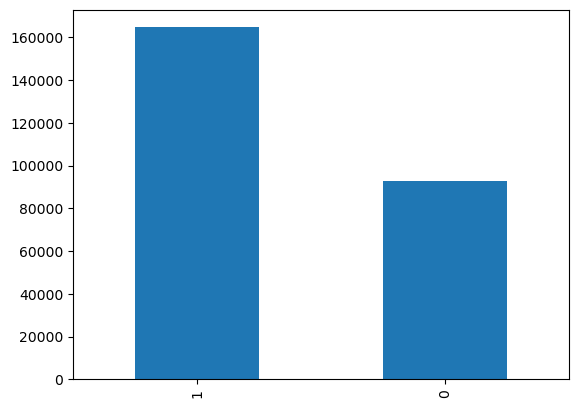

In [6]:
# Check distribution of the data
df['label'].value_counts().plot(kind='bar')
print(df['label'].value_counts())
print(" ")
print(df['label'].value_counts(normalize=True))

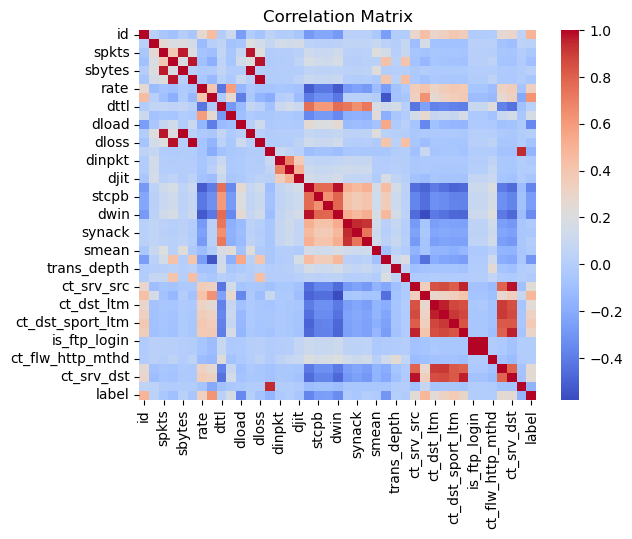

In [7]:
# Correlation analysis

# plot a heatmap
sns.heatmap(df.corr(numeric_only=True),cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

### Manipulate Data

In [8]:
# Remove columns that are unnecessary
# id is only for identification, so is not needed
# attack_cat is not needed because we are only trying to distinguish attack or not - label
df = df.drop(columns=['id', 'attack_cat'])

In [9]:
# Encoding categorical features
df_cat = df.select_dtypes(exclude=[np.number])
print(df_cat.columns)
for feature in df_cat.columns:
    df[feature] = LabelEncoder().fit_transform(df[feature])

Index(['proto', 'service', 'state'], dtype='object')


In [10]:
df.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,0.121478,113,0,4,6,4,258,172,74.087490,252,...,1,1,1,0,0,0,1,1,0,0
1,0.649902,113,0,4,14,38,734,42014,78.473372,62,...,1,1,2,0,0,0,1,6,0,0
2,1.623129,113,0,4,8,16,364,13186,14.170161,62,...,1,1,3,0,0,0,2,6,0,0
3,1.681642,113,3,4,12,12,628,770,13.677108,62,...,1,1,3,1,1,0,2,1,0,0
4,0.449454,113,0,4,10,6,534,268,33.373826,254,...,2,1,40,0,0,0,2,39,0,0


In [11]:
# Encoding dummy variables
#categorical_cols = ['proto', 'service', 'state']

#df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
#print(df.shape)

In [12]:
# Split train and test
X = df.drop('label', axis=1)
features = list(X.columns)
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)
print(X_train.shape, X_test.shape)

(180371, 42) (77302, 42)


In [13]:
# Scaling Data

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
# Create DF for model evaluation

model_performance = pd.DataFrame(columns=['Accuracy','Recall','Precision','F1-Score'])

### Logistic Regression

In [15]:
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# setting evaluation metrics
accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions, average='weighted')
precision = precision_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

# printing metrics
print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1))
model_performance.loc['Logistic'] = [accuracy, recall, precision, f1]

Accuracy: 80.95%
Recall: 80.95%
Precision: 82.23%
F1-Score: 79.63%


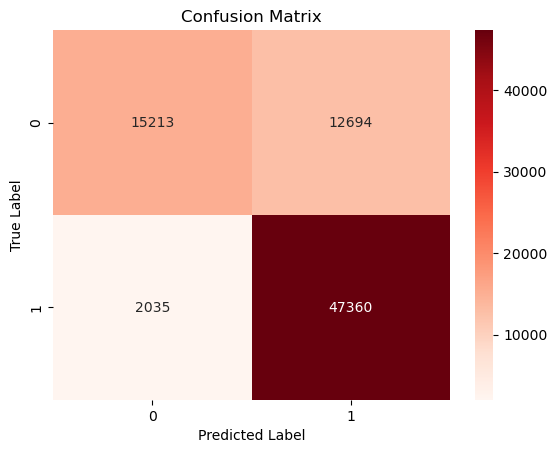

In [16]:
# Plot confusion matrix using seaborn
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt="d", cmap="Reds")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

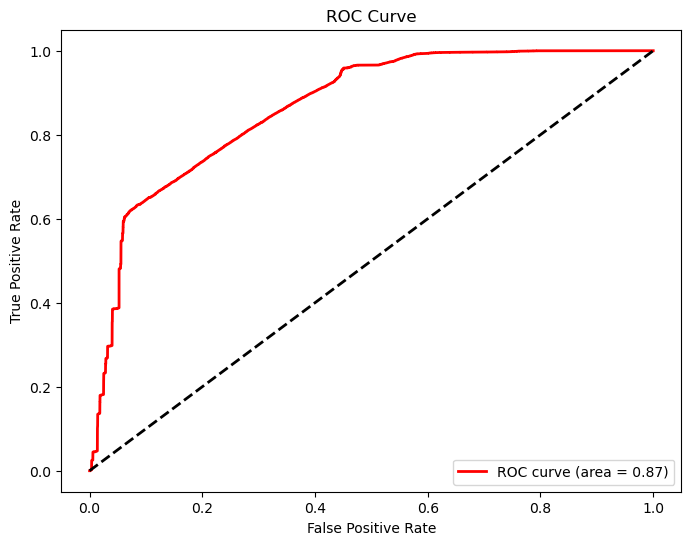

In [17]:
y_score = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### Decision Tree

In [18]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# setting evaluation metrics
accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions, average='weighted')
precision = precision_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

# printing metrics
print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1))

Accuracy: 93.68%
Recall: 93.68%
Precision: 93.69%
F1-Score: 93.69%


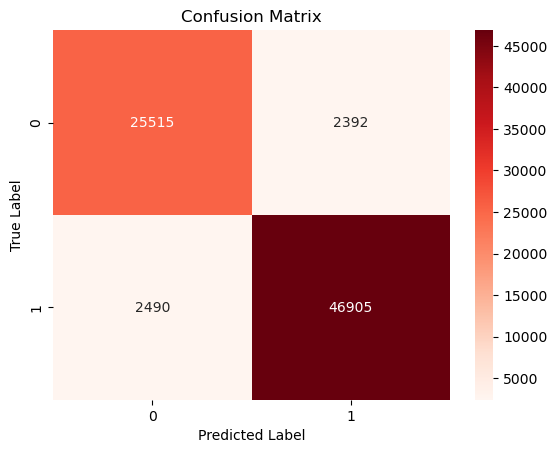

In [19]:
# Plot confusion matrix using seaborn
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt="d", cmap="Reds")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

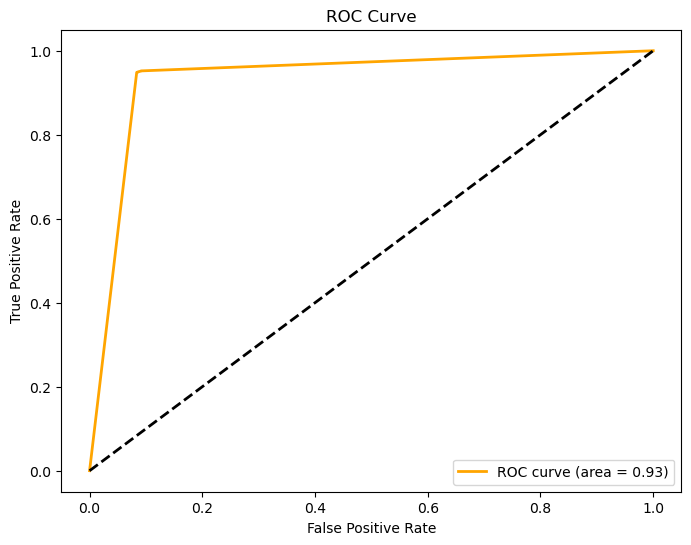

In [20]:
y_score = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

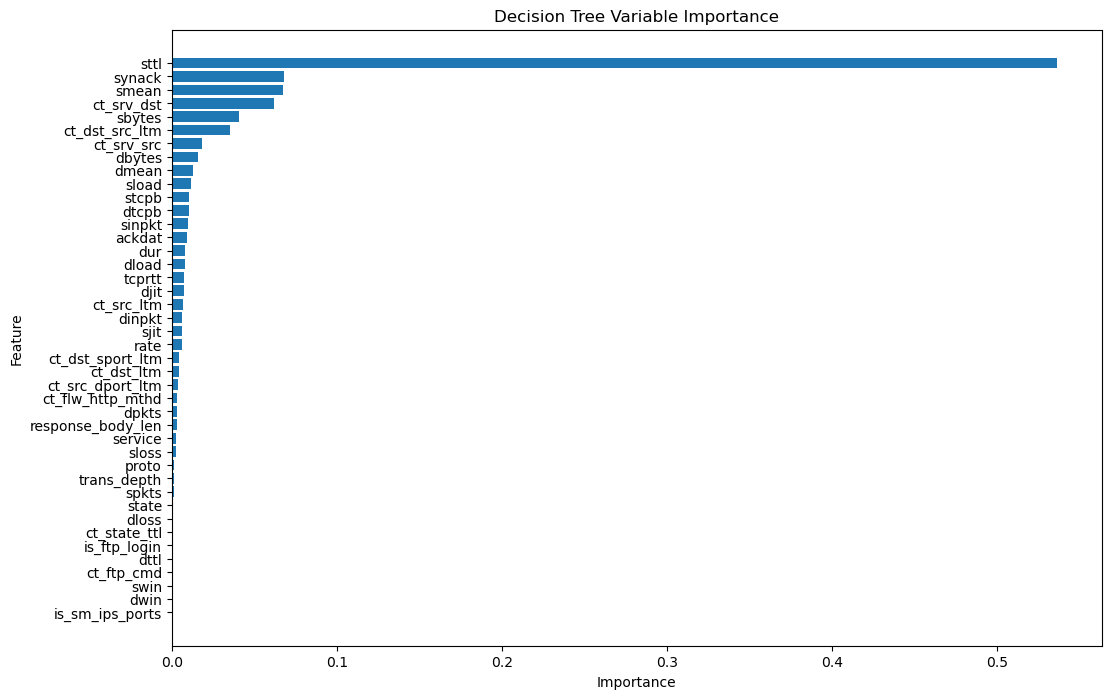

In [21]:
# Get feature importances from the trained model
feature_importances = model.feature_importances_

# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Plot the variable importance
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Decision Tree Variable Importance')
plt.show()

In [22]:
top_features = feature_importance_df.nlargest(35, 'Importance')

# Extract the top features as a list
selected_features = top_features['Feature'].tolist()

# Now, you can use selected_features in your model
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [23]:
# Running the model again based on removed variables

dt_model_selected = DecisionTreeClassifier(max_depth=20, criterion='entropy', random_state=42)

# Train the model on the new dataset
dt_model_selected.fit(X_train_selected, y_train)
predictions = dt_model_selected.predict(X_test_selected)

# setting evaluation metrics
accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions, average='weighted')
precision = precision_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

# printing metrics
print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1))
model_performance.loc['Gradient Boosting'] = [accuracy, recall, precision, f1]

Accuracy: 94.23%
Recall: 94.23%
Precision: 94.31%
F1-Score: 94.25%


### Gradient Boosting

In [24]:
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# setting evaluation metrics
accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions, average='weighted')
precision = precision_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

# printing metrics
print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1))

Accuracy: 93.29%
Recall: 93.29%
Precision: 93.28%
F1-Score: 93.28%


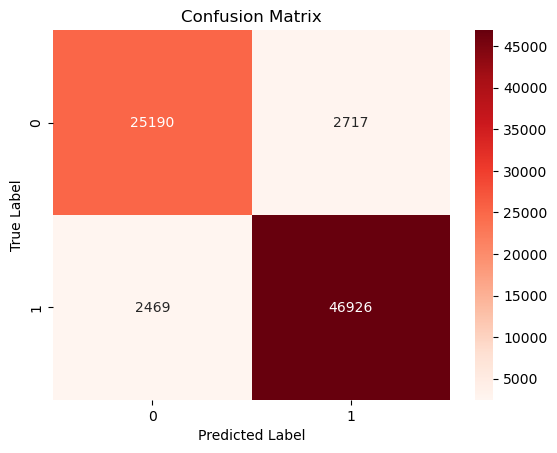

In [25]:
# Plot confusion matrix using seaborn
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt="d", cmap="Reds")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

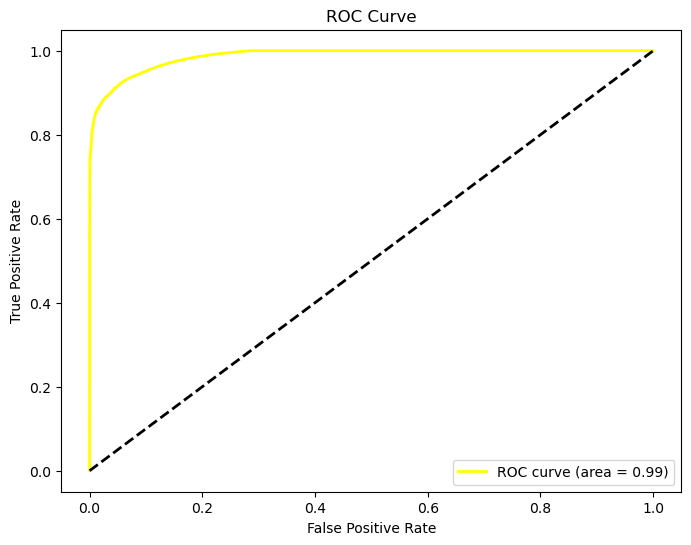

In [26]:
y_score = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='yellow', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

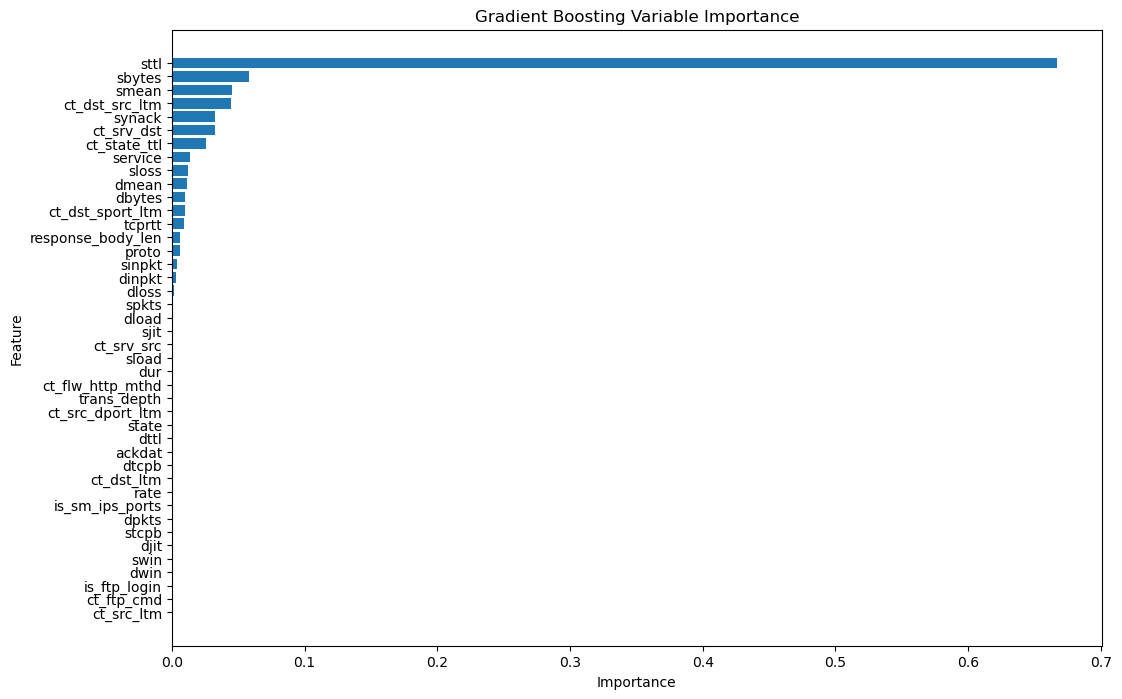

In [27]:
# Get feature importances from the trained model
feature_importances = model.feature_importances_

# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Plot the variable importance
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Gradient Boosting Variable Importance')
plt.show()

In [28]:
top_features = feature_importance_df.nlargest(20, 'Importance')

# Extract the top features as a list
selected_features = top_features['Feature'].tolist()

# Now, you can use selected_features in your model
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [29]:
# Running the model again based on removed variables

gb_model_selected = GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, max_depth=8, random_state=42)

# Train the model on the new dataset
gb_model_selected.fit(X_train_selected, y_train)
predictions = gb_model_selected.predict(X_test_selected)

# setting evaluation metrics
accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions, average='weighted')
precision = precision_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

# printing metrics
print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1))
model_performance.loc['Gradient Boosting'] = [accuracy, recall, precision, f1]

Accuracy: 94.71%
Recall: 94.71%
Precision: 94.72%
F1-Score: 94.71%


### Random Forest

In [30]:
model = RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# setting evaluation metrics
accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions, average='weighted')
precision = precision_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

# printing metrics
print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1))

Accuracy: 95.06%
Recall: 95.06%
Precision: 95.07%
F1-Score: 95.06%


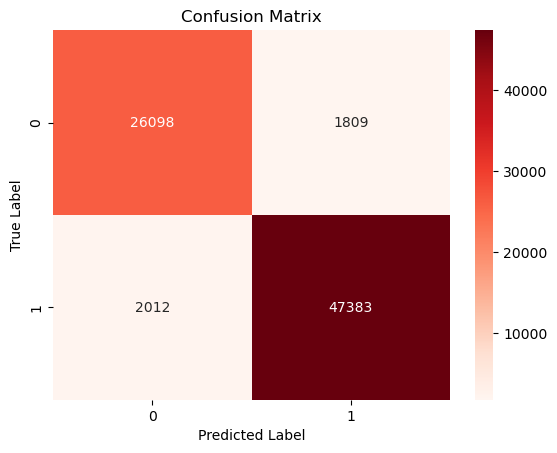

In [31]:
# Plot confusion matrix using seaborn
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt="d", cmap="Reds")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

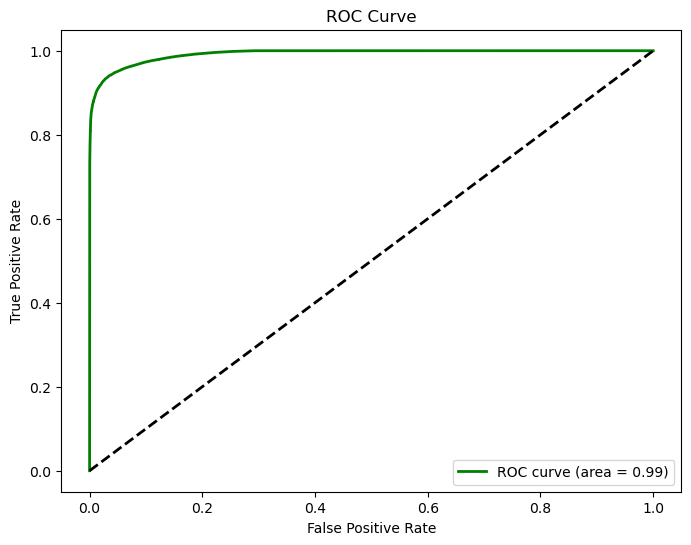

In [32]:
y_score = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

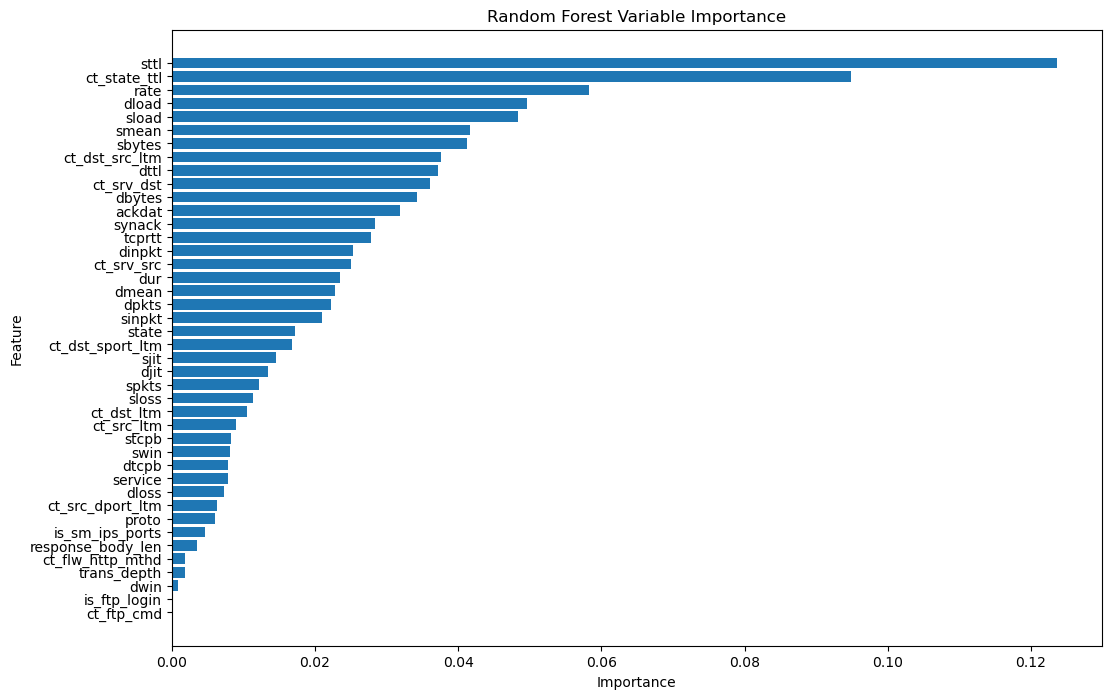

In [33]:
# Get feature importances from the trained model
feature_importances = model.feature_importances_

# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Plot the variable importance
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Random Forest Variable Importance')
plt.show()

In [34]:
top_features = feature_importance_df.nlargest(50, 'Importance')

# Extract the top features as a list
selected_features = top_features['Feature'].tolist()

# Now, you can use selected_features in your model
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [35]:
# Running the model again based on removed variables

rf_model_selected = RandomForestClassifier(n_estimators=300, bootstrap=True, random_state=42)

# Train the model on the new dataset
rf_model_selected.fit(X_train_selected, y_train)

# Make predictions on the test set
predictions = rf_model_selected.predict(X_test_selected)

# setting evaluation metrics
accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions, average='weighted')
precision = precision_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

# printing metrics
print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1))
model_performance.loc['Random Forest'] = [accuracy, recall, precision, f1]

Accuracy: 95.07%
Recall: 95.07%
Precision: 95.08%
F1-Score: 95.07%


### Neural Network

#### GRU

In [36]:
# Build model

def build_model():
    model = Sequential()
    model.add(GRU(units=50, input_shape=(X_train.shape[1], 1)))
    model.add(Dense(units=1, activation='sigmoid'))
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

# reshape input data
X_train_array = array(X_train)
print(len(X_train_array))
X_train_reshaped = X_train_array.reshape(X_train_array.shape[0], X_train_array.shape[1], 1)

#reshape output data
X_test_array=  array(X_test)
X_test_reshaped = X_test_array.reshape(X_test_array.shape[0], X_test_array.shape[1], 1)

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# run model
model = build_model()

# fit model
n_epochs = 10
batch_size = 72

model.fit(X_train_reshaped, y_train, epochs=n_epochs, batch_size=batch_size)

180371
Epoch 1/10
2506/2506 [==============================] - 26s 10ms/step - loss: 0.2393 - accuracy: 0.8896
Epoch 2/10
2506/2506 [==============================] - 25s 10ms/step - loss: 0.1650 - accuracy: 0.9232
Epoch 3/10
2506/2506 [==============================] - 25s 10ms/step - loss: 0.1545 - accuracy: 0.9276
Epoch 4/10
2506/2506 [==============================] - 25s 10ms/step - loss: 0.1466 - accuracy: 0.9301
Epoch 5/10
2506/2506 [==============================] - 25s 10ms/step - loss: 0.1438 - accuracy: 0.9318
Epoch 6/10
2506/2506 [==============================] - 25s 10ms/step - loss: 0.1409 - accuracy: 0.9319
Epoch 7/10
2506/2506 [==============================] - 25s 10ms/step - loss: 0.1388 - accuracy: 0.9326
Epoch 8/10
2506/2506 [==============================] - 27s 11ms/step - loss: 0.1373 - accuracy: 0.9333
Epoch 9/10
2506/2506 [==============================] - 26s 11ms/step - loss: 0.1351 - accuracy: 0.9345
Epoch 10/10
2506/2506 [==============================] - 

In [37]:
# Predictions
y_prob = model.predict(X_test_reshaped)
y_pred = (y_prob > 0.5).astype(int)

# Evaluate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
print("Accuracy: {:.2%}".format(accuracy))
print("Precision: {:.2%}".format(precision))
print("Recall: {:.2%}".format(recall))
print("F1-Score: {:.2%}".format(f1))

model_performance.loc['GRU'] = [accuracy, recall, precision, f1]

2416/2416 [==============================] - 5s 2ms/step
Accuracy: 93.00%
Precision: 93.73%
Recall: 95.43%
F1-Score: 94.57%


#### LSTM

In [38]:
# Build model

def build_model():
    model = Sequential()
    model.add(LSTM(units=50, input_shape=(X_train.shape[1], 1)))
    model.add(Dense(units=1, activation='sigmoid'))
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

# Reshape input data
X_train_array = array(X_train)
X_train_reshaped = X_train_array.reshape(X_train_array.shape[0], X_train_array.shape[1], 1)

# Reshape output data
X_test_array = array(X_test)
X_test_reshaped = X_test_array.reshape(X_test_array.shape[0], X_test_array.shape[1], 1)

# Early stopping
early_stopping_lstm = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Run model
model = build_model()

# Fit model
n_epochs = 10
batch_size = 72

model.fit(X_train_reshaped, y_train, epochs=n_epochs, batch_size=batch_size)

Epoch 1/10
2506/2506 [==============================] - 28s 11ms/step - loss: 0.2226 - accuracy: 0.8896
Epoch 2/10
2506/2506 [==============================] - 27s 11ms/step - loss: 0.1779 - accuracy: 0.9101
Epoch 3/10
2506/2506 [==============================] - 27s 11ms/step - loss: 0.1615 - accuracy: 0.9194
Epoch 4/10
2506/2506 [==============================] - 27s 11ms/step - loss: 0.1563 - accuracy: 0.9244
Epoch 5/10
2506/2506 [==============================] - 27s 11ms/step - loss: 0.1543 - accuracy: 0.9275
Epoch 6/10
2506/2506 [==============================] - 27s 11ms/step - loss: 0.1472 - accuracy: 0.9295
Epoch 7/10
2506/2506 [==============================] - 27s 11ms/step - loss: 0.1438 - accuracy: 0.9315
Epoch 8/10
2506/2506 [==============================] - 27s 11ms/step - loss: 0.1412 - accuracy: 0.9321
Epoch 9/10
2506/2506 [==============================] - 27s 11ms/step - loss: 0.1406 - accuracy: 0.9328
Epoch 10/10
2506/2506 [==============================] - 28s 11m

In [39]:
# Predictions
y_prob = model.predict(X_test_reshaped)
y_pred = (y_prob > 0.5).astype(int)

# Evaluate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
print("Accuracy: {:.2%}".format(accuracy))
print("Precision: {:.2%}".format(precision))
print("Recall: {:.2%}".format(recall))
print("F1-Score: {:.2%}".format(f1))

model_performance.loc['LSTM'] = [accuracy, recall, precision, f1]

2416/2416 [==============================] - 6s 2ms/step
Accuracy: 93.20%
Precision: 93.95%
Recall: 95.50%
F1-Score: 94.72%


In [40]:
model_performance.fillna('')
model_performance.style.background_gradient(cmap='Spectral').format({'Accuracy': '{:.2%}',
                                                                     'Precision': '{:.2%}',
                                                                     'Recall': '{:.2%}',
                                                                     'F1-Score': '{:.2%}',
                                                                     })

,Accuracy,Recall,Precision,F1-Score
Logistic,80.95%,80.95%,82.23%,79.63%
Gradient Boosting,94.71%,94.71%,94.72%,94.71%
Random Forest,95.07%,95.07%,95.08%,95.07%
GRU,93.00%,95.43%,93.73%,94.57%
LSTM,93.20%,95.50%,93.95%,94.72%


### Conclusion

Based on the evaluation metrics obtained from the various models applied to the dataset, it is evident that the Random Forest and Gradient Boosting models outperform the Logistic Regression, GRU, and LSTM models across all metrics, including accuracy, recall, precision, and F1-score. The Random Forest and Gradient Boosting models demonstrate superior predictive performance, achieving accuracy rates exceeding 95%, and exhibiting well-balanced recall, precision, and F1-score values. These results suggest that ensemble methods, particularly Random Forest and Gradient Boosting, are well-suited for the task at hand, showcasing robustness in classification accuracy and overall model effectiveness. Additionally, the deep learning models, GRU and LSTM, also perform admirably but show a slight trade-off between precision and recall compared to the ensemble models. Overall, the Random Forest and Gradient Boosting models stand out as the top performers in this classification task.